# Pravdepodobnostné prístupy a Bayesovská klasifikácia

---

## Obsah
- Pravdepodobnostné prístupy - popis
- Bayesova veta - teória, príklad
- Naivný Bayesov klasifikátor - popis, interaktívny príklad a interpretácia výsledkov

---

## Pravdepodobnostné prístupy

- pravdepodobnostné prístupy v strojovom učení poskytujú **pravdepodobnosti**, že bod patrí do určitej triedy namiesto priameho rozhodnutia
- modely sú založené na **štatistických a pravdepodobnostných metódach** a dokážu **kvantifikovať neistotu predikcie**
  
---

## Bayesova veta - teória

- Bayesova veta umožňuje vypočítať pravdepodobnosť určitej hypotézy (A) na základe pozorovaných dôkazov (B)

Matematický zápis Bayesovej vety:
$$
P(A \mid B) = \frac{P(B \mid A) \ \cdot P(A)}{P(B)}
$$

Kde:
- P(X): Pravdepodobnosť udalosti (X), bez ohľadu na (Y)
- P(X | Y): Pravdepodobnosť pozorovania udalosti(X), za predpokladu že (Y) nastalo

---

## Bayesova veta - praktický príklad
### Diagnostický test na chorobu

Poznáme:
- koľko % z celkovej populácie má chorobu
- koľko % infikovaných osôb má pozitívny test
- koľko % zdravých osôb má pozitívny test - falošne pozitívny

Úloha: 
- ak je test pozitívny, aká je pravdepodobnosť že osoba je skutočne infikovaná?

Bayesov vzorec pre túto úlohu bude mať tvar:
$$
P(Infikovaný \mid Pozitívny) = \frac{P(Pozitívny \mid Infikovaný) \  P(Infikovaný)}{P(Pozitívny)}
$$

---

In [1]:
# Zadanie vstupov
P_population_infected = (int(input("Koľko % z celkovej populácie má chorobu? "))) / 100
P_positive_given_infected = (int(input("Koľko % infikovaných osôb má pozitívny test? "))) / 100
P_positive_given_healthy = (int(input("Koľko % zdravých osôb má pozitívny test? "))) / 100

# Výpočet doplnkových pravdepodobností
P_population_healthy = 1 - P_population_infected
P_negative_given_infected = 1 - P_positive_given_infected
P_negative_given_healthy = 1 - P_positive_given_healthy

Koľko % z celkovej populácie má chorobu?  1
Koľko % infikovaných osôb má pozitívny test?  95
Koľko % zdravých osôb má pozitívny test?  10


In [2]:
# Výpisanie vstupov pre úlohu

print("\nTabuľka zadaných a odvodených pravdepodobností:\n")
print(f"P(Infikovaný)                = {P_population_infected*100:.2f}%")
print(f"P(Zdravý)                    = {P_population_healthy*100:.2f}%")
print(f"P(Pozitívny | Infikovaný)    = {P_positive_given_infected*100:.2f}%")
print(f"P(Negatívny | Infikovaný)    = {P_negative_given_infected*100:.2f}%")
print(f"P(Pozitívny | Zdravý)        = {P_positive_given_healthy*100:.2f}%")
print(f"P(Negatívny | Zdravý)        = {P_negative_given_healthy*100:.2f}%")


Tabuľka zadaných a odvodených pravdepodobností:

P(Infikovaný)                = 1.00%
P(Zdravý)                    = 99.00%
P(Pozitívny | Infikovaný)    = 95.00%
P(Negatívny | Infikovaný)    = 5.00%
P(Pozitívny | Zdravý)        = 10.00%
P(Negatívny | Zdravý)        = 90.00%


In [3]:
# Výpočet pravdepodobnosti pozitívnch testov
P_positive = (P_positive_given_infected * P_population_infected + P_positive_given_healthy * P_population_healthy)
print(f"Celková pravdepodobnosť pozitívneho testu je: {P_positive:.2%}") 

# Výpočet pravdepodobnosti infikovanej osoby po pozitínom test
P_infected_given_positive = (P_positive_given_infected * P_population_infected) / P_positive
print(f"Pravdepodobnosť, že osoba je infikovaná po pozitívnom teste: {P_infected_given_positive:.2%}") 

Celková pravdepodobnosť pozitívneho testu je: 10.85%
Pravdepodobnosť, že osoba je infikovaná po pozitívnom teste: 8.76%


#### Úlohy na zamyslenie
- skús meniť % infikovaných osôb v populácii a sleduj, ako sa mení pravdepodobnosť, že osoba je infikovaná po pozitívnom teste  
- ktorá kombinácia parametrov robí test “spoľahlivejším” z pohľadu identifikácie chorých osôb?
- sleduj, ako aj malé zmeny falošne pozitívnych môžu dramaticky zmeniť pravdepodobnosť infekcie po pozitívnom teste 
- môže byť situácia, keď test je veľmi presný, ale pravdepodobnosť po pozitívnom teste je stále nízka?

---

## Naivný Bayesov klasifikátor

- je **pravdepodobnostný model** používaný na klasifikáciu dát, ktorý teoreticky vychádza z Bayesovej vety
- predpokladá, že všetky **atribúty (vlastnosti) sú navzájom nezávislé**
- tento predpoklad je veľmi silný a „naivný“, ale  v praxi často funguje až prekvapivo dobre
- odhaduje pravdepodobnosť, že daný vzor **patrí do určitej triedy**
- pri klasifikácií vypočíta pravdepodobnosť každej triedy a vyberá triedu s najvyššou pravdepodobnosťou

##### Bayesova veta pre klasifikáciu

$$
P(C \mid X) = \frac{P(X \mid C) \cdot P(C)}{P(X)}
$$

Kde:  
- $P(C \mid X)$ – posterior pravdepodobnosť, že vzor $X$ patrí do triedy $C$  
- $P(C)$ – prior pravdepodobnosť triedy $C$  
- $P(X \mid C)$ – pravdepodobnosť vidieť vzor $X$, ak je z triedy $C$  
- $P(X)$ – celková pravdepodobnosť vzoru $X$ 

##### Naivný predpoklad

- naivný Bayesov klasifikátor predpokladá nezávislosť atribútov - ide o **naivný predpoklad**
- po uplatnení naivného predpokladu vzťah pre výpočet pravdepodobnosti triedy pre vzor sa zjednoduší na:

$$
P(C \mid X) \approx \prod P(x_i \mid C) \cdot P(C) 
$$

- pri klasifikácií výber triedy s najvyššou pravdepodobnosťou:

$$
C_{\text{predicted}} = \arg \max \big( \prod P(x_i \mid C) \cdot P(C) \big)
$$

---

### Praktický príklad

#### Klasifikácia objektov do tried

- aplikujeme **naivný Bayesov klasifikátor** na klasifikáciu objektov na základe ich vlastností 
- na výber budú 2 datasety - druhy kvetov a druhy vína
- pre vizualizáciu a zjednodušenie budeme používať len 2 vlastnosti objektov - 2D priestor
- datasety obsahujú 3 triedy objektov

In [4]:
# Importovanie

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import load_iris, load_wine
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from math import exp, sqrt, pi
from matplotlib.colors import ListedColormap

In [5]:
# Načítanie dát pre model

data = load_iris() #load_iris() load_wine()
X = data.data[:, :2]
y = data.target
target_names = data.target_names
print(f"Počet vzoriek: {X.shape[0]}")

Počet vzoriek: 150


In [6]:
# Rozdelenie dát na trénovaciu a testovaciu množinu

trainSize = int(input("Koľko % z dát má model použiť na tréning? -> Zvyšok bude použitý na test.  "))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - (trainSize/100), random_state=42)

Koľko % z dát má model použiť na tréning? -> Zvyšok bude použitý na test.   75


In [7]:
# Trénovanie modelu na trénovacej množine
model = GaussianNB()
model.fit(X_train, y_train)

# Testovanie klasifikácie modelu na testovacej množine
y_pred = model.predict(X_test)

#### Ukážka výpočtu predikcie pre konkrétny bod
- vyberieme jeden bod z testovacej množiny a ukážeme, ako model počíta pravdepodobnosti a klasifikuje do tried

##### Vybraný bod
- bod: `[x1, x2]` - prvé dva atribúty z datasetu
- skutočná trieda

##### Likelihood (`P(X|C)`)
- pre každú triedu `C` spočítame pravdepodobnosť, že bod X vznikol v danej triede
- výsledok ukazuje, **ako dobre sa hodí bod k tejto triede**
- pravdepodobnosť, že bod **X** má práve takéto hodnoty atribútov, **ak by patril do triedy C**

##### Prior (`P(C)`)
- prior pravdepodobnosť triedy v trénovacích dátach
- ukazuje, **aká je všeobecná šanca bodu patriť do danej triedy pred zohľadnením atribútov**

##### Posterior (`P(C|X)`)
- kombinuje likelihood a prior
- trieda s najvyšším posteriorom sa vyberie ako predikcia
- tento krok ukazuje ako model **počítá pravdepodobnosti** pre každú triedu a klasifikuje bod

##### Výsledok
- predikovaná trieda - trieda s najvyššou Posterior pravdepodobnosťou
- pravdepodobnosti jednotlivých tried

In [8]:
user_input = int(input(f"Vyber bod z testovacej množiny 1-{X_test.shape[0]}: "))
index = user_input - 1

x_sample = X_test[index]
y_true = y_test[index]

print(f"Vybraný bod: {x_sample}")
print(f"Skutočná trieda: {data.target_names[y_true]}\n")

means = model.theta_
variances = model.var_
priors = model.class_prior_

for i, class_name in enumerate(data.target_names):
    likelihood = 1
    for j in range(len(x_sample)):
        mean = means[i][j]
        var = variances[i][j]
        prob = (1 / sqrt(2 * pi * var)) * exp(-((x_sample[j] - mean)**2) / (2 * var))
        likelihood *= prob
    posterior = likelihood * priors[i]
    print(f"{class_name}:")
    print(f" - likelihood: P(X|{class_name}) = {likelihood:.4f}")
    print(f" - prior: P({class_name}) = {priors[i]:.4f}")
    print(f" - posterior: P(X|{class_name}) * P({class_name}) = {posterior:.4F}\n")

pred_class = model.predict([x_sample])[0]
print(f"Predikovaná trieda: {data.target_names[pred_class]}")

Vyber bod z testovacej množiny 1-38:  1


Vybraný bod: [6.1 2.8]
Skutočná trieda: versicolor

setosa:
 - likelihood: P(X|setosa) = 0.0013
 - prior: P(setosa) = 0.3125
 - posterior: P(X|setosa) * P(setosa) = 0.0004

versicolor:
 - likelihood: P(X|versicolor) = 0.8795
 - prior: P(versicolor) = 0.3482
 - posterior: P(X|versicolor) * P(versicolor) = 0.3062

virginica:
 - likelihood: P(X|virginica) = 0.5312
 - prior: P(virginica) = 0.3393
 - posterior: P(X|virginica) * P(virginica) = 0.1802

Predikovaná trieda: versicolor


---

### Interpretácia výsledkov modelu
- presnosť
- matica zámen
- rozhodovacie hranice
- pravdepodobnosti tried
- hustotu pravdepodobnosti pre jednotlivé atribúty

---

#### Presnosť
- vyjadruje ako presne model dokázal klasifikovať vzorky do tried
- rozsah od 0 do 1, pričom 1 znamená úplnú presnosť

##### Úloha na zamyslenie
- skús meniť pomer rozdelenia dát na trénovaciu a testovaciu množinu (napr. 70/30, 80/20, 50/50) a sleduj, ako sa mení presnosť modelu    


In [9]:
acc = accuracy_score(y_test, y_pred)
print(f"Presnosť: {acc:.4f}")

Presnosť: 0.8421


---

#### Matica zámen
- matica zámen zobrazuje počty správnych a nesprávnych predikcií pre jednotlivé triedy
- najväčšie čísla na diagonále znamenajú lepšiu presnosť modelu
- takisto je možné zistiť, ktoré triedy si model najčastejšie zamieňal medzi sebou, ako aj ktoré triedy dokázal rozpoznávať najpresnejšie

##### Úloha na zamyslenie
- skús meniť veľkosť trénovacej množiny a sleduj, ako sa mení správanie modelu v kontexte rozpoznávania tried

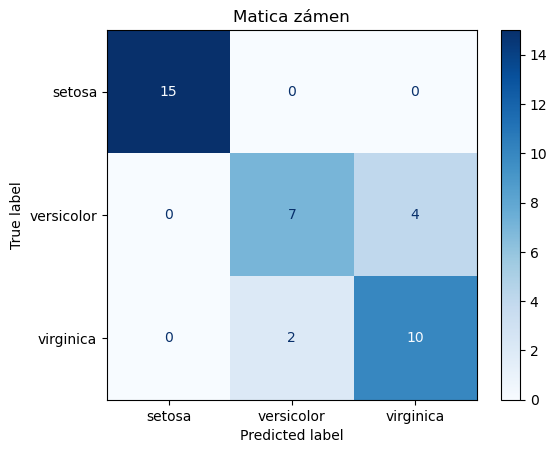

In [10]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matica zámen")
plt.show()

---

#### Rozhodovacie hranice
- zobrazujú, ako model rozdeľuje priestor vstupných údajov medzi jednotlivé triedy, teda kde presne prechádza hranica medzi oblasťami tried

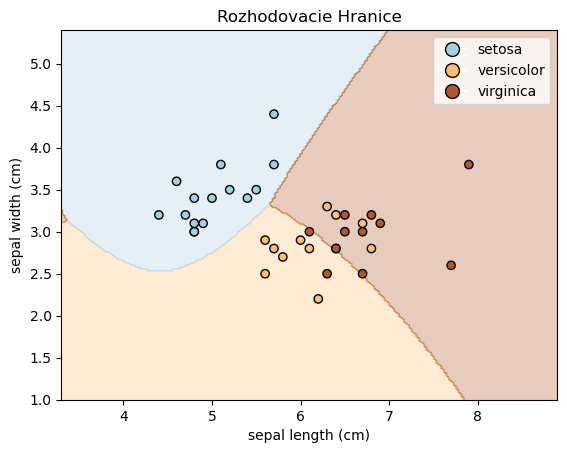

In [11]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

colors = plt.cm.Paired(np.linspace(0, 1, len(data.target_names)))
cmap_background = ListedColormap(colors)
cmap_points = ListedColormap(colors)

plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_background)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', cmap=cmap_points)
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.title("Rozhodovacie Hranice")
colors = plt.cm.Paired(np.linspace(0, 1, len(data.target_names)))
handles = [
    plt.Line2D([0], [0], marker='o', color='w',
               markerfacecolor=colors[i], markeredgecolor='k',
               markersize=10, label=data.target_names[i])
    for i in range(len(data.target_names))
]
plt.legend(handles=handles, loc="upper right")
plt.show()

#### Pridanie vlastného bodu
- do vizualizácie rozhodovacích hraníc môžeš **pridať nový bod**
- zadaj atribúty bodu - bod bude zobrazený na grafe
- sleduj ako ho model klasifikuje pomocou existujúcich rozhodovacích hraníc

Zadaj hodnotu pre sepal length (cm):  6.1
Zadaj hodnotu pre sepal width (cm):  2.8


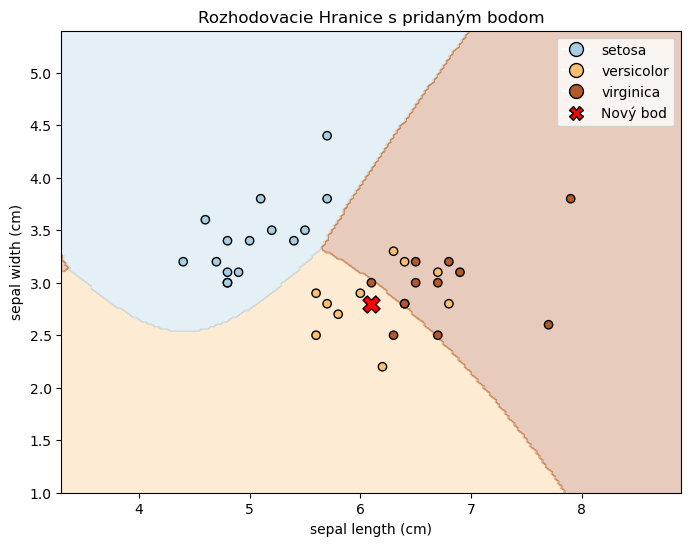

Pridaný bod - predikovaná trieda - versicolor s posterior: 0.3062


In [12]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
colors = plt.cm.Paired(np.linspace(0, 1, len(data.target_names)))
cmap_background = ListedColormap(colors)
cmap_points = ListedColormap(colors)

fig, ax = plt.subplots(figsize=(8,6))
ax.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_background)
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', cmap=cmap_points)
ax.set_xlabel(data.feature_names[0])
ax.set_ylabel(data.feature_names[1])
ax.set_title("Rozhodovacie Hranice s pridaným bodom")
colors = plt.cm.Paired(np.linspace(0, 1, len(data.target_names)))
handles = [
    plt.Line2D([0], [0], marker='o', color='w',
               markerfacecolor=colors[i], markeredgecolor='k',
               markersize=10, label=data.target_names[i])
    for i in range(len(data.target_names))
]

x_input = float(input(f"Zadaj hodnotu pre {data.feature_names[0]}: "))
y_input = float(input(f"Zadaj hodnotu pre {data.feature_names[1]}: "))

new_point = np.array([[x_input, y_input]])
pred_class = model.predict(new_point)[0]
pred_proba = model.predict_proba(new_point)[0]

ax.scatter(x_input, y_input, c='red', s=150, edgecolor='k', marker='X', label='Nový bod')
handles.append(
    plt.Line2D([0], [0], marker='X', color='w',
               markerfacecolor='red', markeredgecolor='k',
               markersize=10, label='Nový bod')
)
ax.legend(handles=handles, loc="upper right")
plt.show()

posterior = priors[pred_class] * np.prod([
    (1 / sqrt(2 * pi * variances[pred_class][j])) *
    exp(-((new_point[0, j] - means[pred_class][j]) ** 2) / (2 * variances[pred_class][j]))
    for j in range(new_point.shape[1])
])

print(f"Pridaný bod - predikovaná trieda - {data.target_names[pred_class]} s posterior: {posterior:.4f}")

---

#### Pravdepodobnosti tried
- vyjadrujú, s akou pravdepodobnosťou model priraďuje vzorku k danej triede
- súčet pravdepodobností všetkých tried pre jednu vzorku je vždy rovný 1

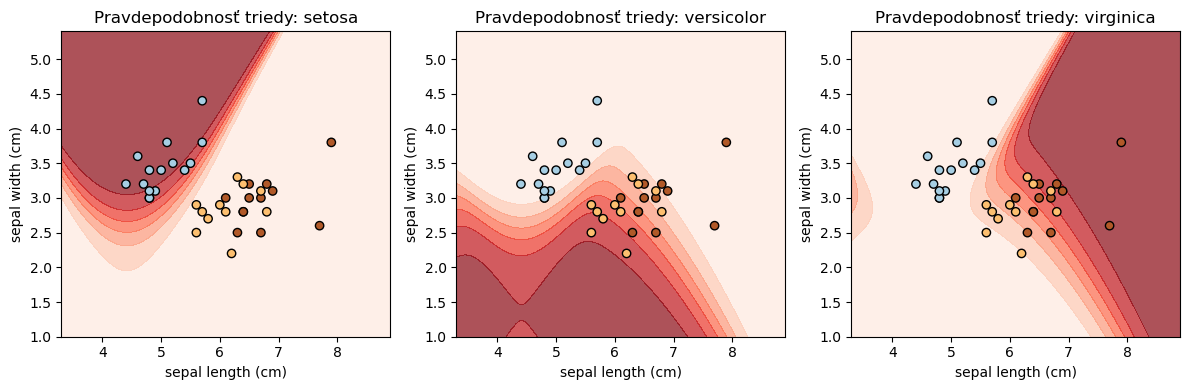

In [13]:
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

probs = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])

plt.figure(figsize=(12,4))
for i, class_name in enumerate(target_names):
    plt.subplot(1,3,i+1)
    Z = probs[:, i].reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.7, cmap=plt.cm.Reds)
    plt.scatter(X_test[:,0], X_test[:,1], c=y_test, edgecolor='k', cmap=plt.cm.Paired)
    plt.title(f"Pravdepodobnosť triedy: {class_name}")
    plt.xlabel(data.feature_names[0])
    plt.ylabel(data.feature_names[1])

plt.tight_layout()
plt.show()

#### Pridanie vlastného bodu
- do vizualizácie pravdepodobností jednotlivých tried môžeš **pridať nový bod**
- zadaj atribúty bodu - bod bude zobrazený na grafe
- sleduj aké pravdepodobnosti priradí model jednotlivým triedam

Zadaj hodnotu pre sepal length (cm):  6.1
Zadaj hodnotu pre sepal width (cm):  2.8



Predikovaná trieda: versicolor
Pravdepodobnosti jednotlivých tried:
- setosa: 0.0008
- versicolor: 0.6290
- virginica: 0.3702


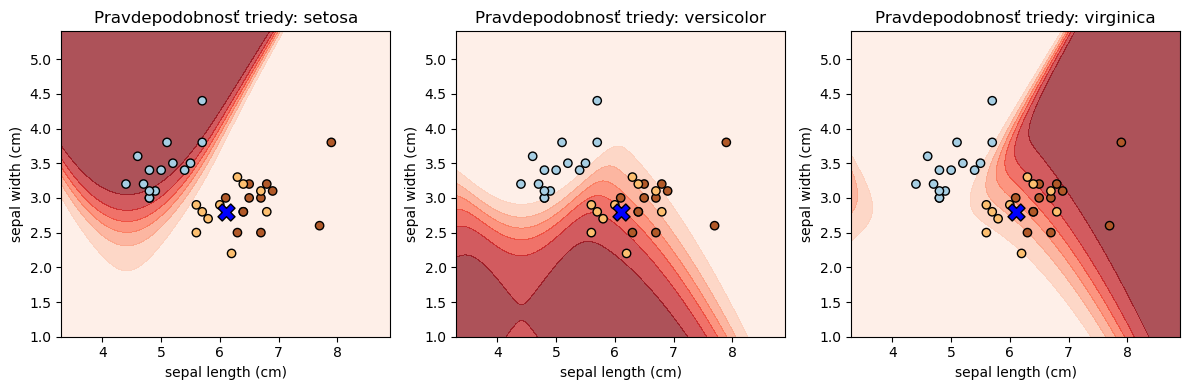

In [14]:
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

probs = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])

x_input = float(input(f"Zadaj hodnotu pre {data.feature_names[0]}: "))
y_input = float(input(f"Zadaj hodnotu pre {data.feature_names[1]}: "))
new_point = np.array([[x_input, y_input]])
pred_proba = model.predict_proba(new_point)[0]
pred_class = model.predict(new_point)[0]

print(f"\nPredikovaná trieda: {data.target_names[pred_class]}")
print("Pravdepodobnosti jednotlivých tried:")
for name, p in zip(target_names, pred_proba):
    print(f"- {name}: {p:.4f}")

plt.figure(figsize=(12,4))
for i, class_name in enumerate(target_names):
    plt.subplot(1,3,i+1)
    Z = probs[:, i].reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.7, cmap=plt.cm.Reds)
    plt.scatter(X_test[:,0], X_test[:,1], c=y_test, edgecolor='k', cmap=plt.cm.Paired)
    plt.scatter(x_input, y_input, c='blue', edgecolor='k', marker='X', s=150)
    plt.title(f"Pravdepodobnosť triedy: {class_name}")
    plt.xlabel(data.feature_names[0])
    plt.ylabel(data.feature_names[1])

plt.tight_layout()
plt.show()

---

#### Hustota pravdepodobnosti pre atribúty
- krivky znázorňujú rozloženie hodnôt atribútu pre jednotlivé triedy
- ak sa krivky prekrývajú málo, atribút dobre rozlišuje triedy, pri silnom prekrývaní je jeho rozlišovacia schopnosť menšia
- graf vizualizuje pravdepodobnosť, že bod patrí do konkrétnej triedy, čo pomáha pochopiť, ako naivný Bayes využije atribút pri klasifikácii

##### Úloha na zamyslenie
- sleduj mieru prekrývania kriviek hustoty pre jednotlivé atribúty a zamysli sa, ako to ovplyvňuje schopnosť modelu správne klasifikovať body


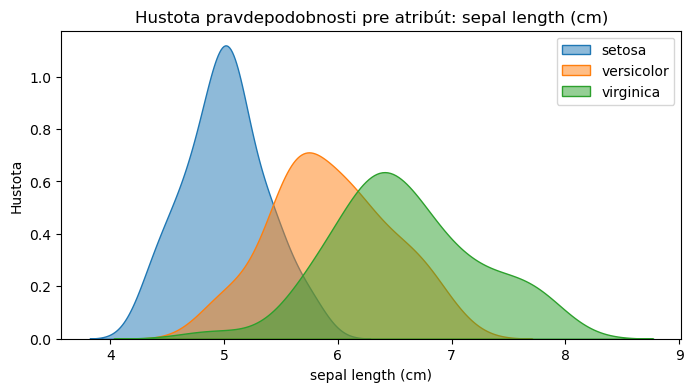

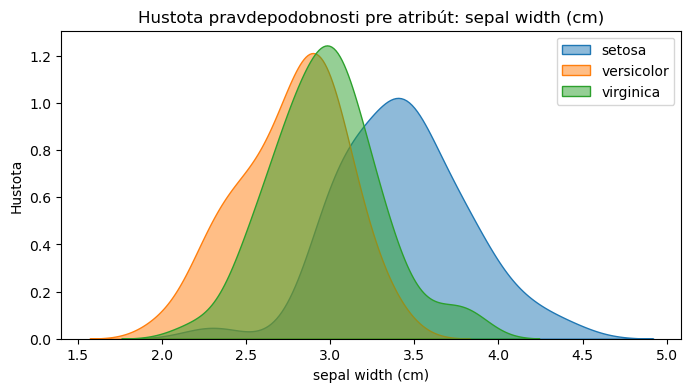

In [15]:
for i, feature in enumerate(data.feature_names[:2]):
    plt.figure(figsize=(8,4))
    for class_idx, class_name in enumerate(data.target_names):
        sns.kdeplot(X[y == class_idx, i], label=f'{class_name}', fill=True, alpha=0.5)
    plt.title(f"Hustota pravdepodobnosti pre atribút: {feature}")
    plt.xlabel(feature)
    plt.ylabel("Hustota")
    plt.legend()
    plt.show()